In [50]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
D = 2.87e9  # Zero-field splitting (in Hz)
Bz = 0.1e-3  # Magnetic field along z (in Tesla)

# Constants
mu_B = 9.274009994e-24  # Bohr magneton (in J/T)
h = 6.62607015e-34  # Planck's constant (in J/Hz)

# Convert magnetic field to energy units
gamma_e = mu_B / h  # Gyromagnetic ratio of the electron (in Hz/T)
Bz_energy = gamma_e * Bz  # Energy corresponding to Bz (in Hz)

# Spin-1 operators
Sx = jmat(1, 'x')
Sy = jmat(1, 'y')
Sz = jmat(1, 'z')

# Hamiltonian
H = D * Sz**2 + Bz_energy * Sz

eigenvalues, eigenstates = H.eigenstates()
print("Eigenvalues:", eigenvalues)
print("Eigenstates:", eigenstates)

Eigenvalues: [0.00000000e+00 2.86860038e+09 2.87139962e+09]
Eigenstates: [Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [1.]
  [0.]]
 Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [1.]]
 Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]]                                                                ]


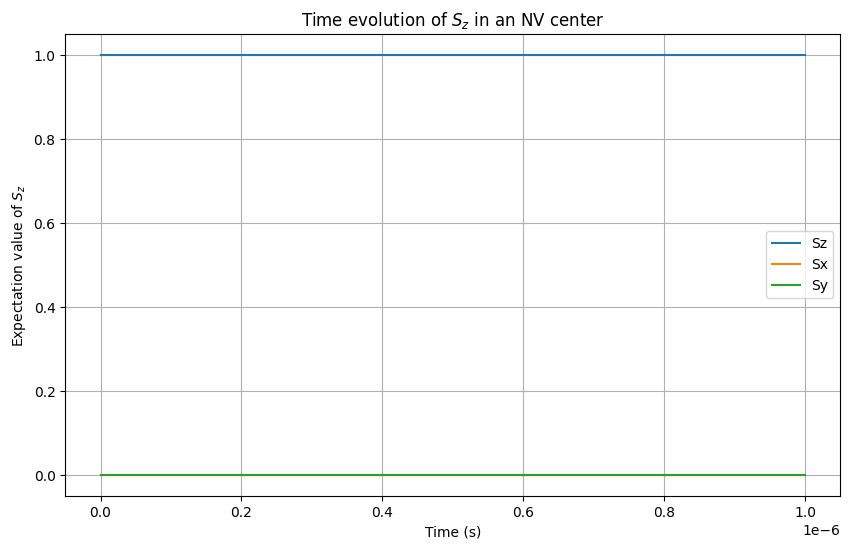

In [51]:
# Initial state (let's take |0> state)
initial_state = basis(3, 0)  # 

# Time points
t_list = np.linspace(0, 1e-6, 1000)  # Time from 0 to 1 microsecond

# Solve the Schrodinger equation
result = mesolve(H, initial_state, t_list, [], [Sz, Sx, Sy])

# Plot Sz expectation value
plt.figure(figsize=(10, 6))
plt.plot(t_list, result.expect[0], label='Sz')
plt.plot(t_list, result.expect[1], label='Sx')
plt.plot(t_list, result.expect[2], label='Sy')
plt.xlabel('Time (s)')
plt.ylabel('Expectation value of $S_z$')
plt.title('Time evolution of $S_z$ in an NV center')
plt.grid()
plt.legend()
plt.show()

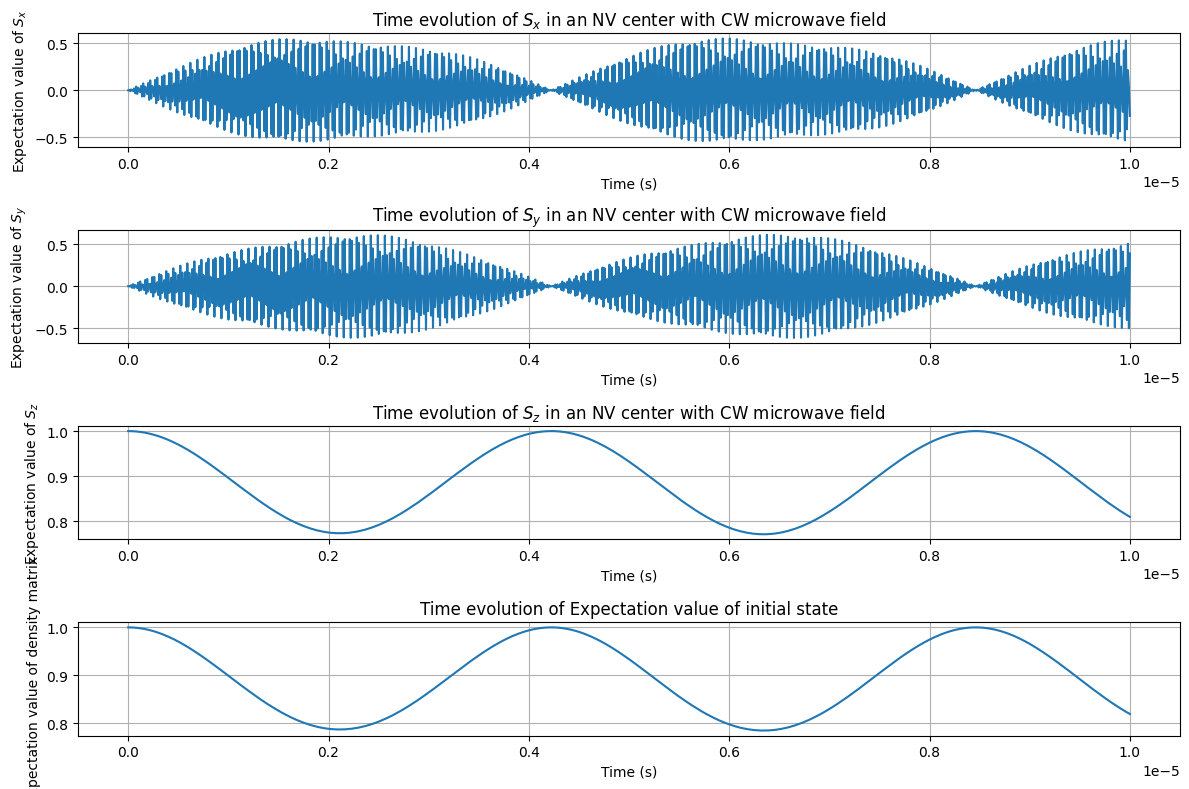

In [64]:
# Hamiltonian without microwave
H0 = D * Sz**2 + Bz_energy * Sz

# Microwave field parameters
omega = 2.87e9  # Microwave frequency (in Hz, same as D for resonance)
Omega = 1e6  # Rabi frequency (in Hz)

# Time-dependent part of the Hamiltonian for CW microwave
H1 =  Omega * (Sx * np.cos(omega) + Sy * np.sin(omega))

# Define the time-dependent Hamiltonian
H = [H0, [H1, 'cos(w*t)']]

# Initial state (let's take |0> state)
initial_state = basis(3, 0)  

initial_state_density_matrix = initial_state * initial_state.dag()

# Time points
t_list = np.linspace(0, 1e-5, 1000)  # Time from 0 to 1 microsecond

# Define the operators for which we want to compute the expectation values
expect_operators = [Sx, Sy, Sz, initial_state_density_matrix]

# Microwave frequency as a parameter for the Hamiltonian
args = {'w': omega}

# Solve the Schrodinger equation
result = mesolve(H, initial_state, t_list, [], expect_operators, args=args)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot Sx expectation value
plt.subplot(411)
plt.plot(t_list, result.expect[0])
plt.xlabel('Time (s)')
plt.ylabel('Expectation value of $S_x$')
plt.title('Time evolution of $S_x$ in an NV center with CW microwave field')
plt.grid()

# Plot Sy expectation value
plt.subplot(412)
plt.plot(t_list, result.expect[1])
plt.xlabel('Time (s)')
plt.ylabel('Expectation value of $S_y$')
plt.title('Time evolution of $S_y$ in an NV center with CW microwave field')
plt.grid()

# Plot Sz expectation value
plt.subplot(413)
plt.plot(t_list, result.expect[2])
plt.xlabel('Time (s)')
plt.ylabel('Expectation value of $S_z$')
plt.title('Time evolution of $S_z$ in an NV center with CW microwave field')
plt.grid()

# Plot Initial state fidelity
plt.subplot(414)
plt.plot(t_list, result.expect[3])
plt.xlabel('Time (s)')
plt.ylabel('Expectation value of density matrix')
plt.title('Time evolution of Expectation value of initial state')
plt.grid()

plt.tight_layout()
plt.show()